In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
df = p.read_csv("Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
from sklearn.preprocessing import Binarizer
b = Binarizer(threshold = 0.75)
df['Chance of Admit '] = b.fit_transform(df[["Chance of Admit "]])
df

#The code you provided uses the Binarizer class from the sklearn.preprocessing library to binarize the Chance of Admit column in the df DataFrame. The threshold parameter specifies the threshold that is used to binarize the data. Values above the threshold are mapped to 1, and values below the threshold are mapped to 0.
#The Binarizer class has two main methods:
#fit_transform(): This method fits the Binarizer object to the data and then transforms the data using the fitted parameters.
#transform(): This method transforms the data using the fitted parameters.
#In this case, we are using the fit_transform() method because we need to fit the Binarizer object to the data before we can transform it.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0
496,497,337,117,5,5.0,5.0,9.87,1,1.0
497,498,330,120,5,4.5,5.0,9.56,1,1.0
498,499,312,103,4,4.0,5.0,8.43,0,0.0


In [4]:
x = df.iloc[:, 1:8]
x

#The code x = df.iloc[:, 1:8] extracts the columns from 1 to 7 from the DataFrame df and assigns them to the variable x. This is a common operation in machine learning, as it is often necessary to select a subset of features from a DataFrame before training a model.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [5]:
y = df.iloc[:, 8:]
y

,Chance of Admit
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
495,1.0
496,1.0
497,1.0
498,0.0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#The code from sklearn.model_selection import train_test_split x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0) print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) imports the train_test_split() function from the sklearn.model_selection module and then uses it to split the x and y arrays into training and test sets. The test_size parameter specifies that 25% of the data will be used for the test set. The random_state parameter is used to ensure that the split is reproducible.
#The x_train and y_train arrays will contain the training data, and the x_test and y_test arrays will contain the test data. The shapes of the four arrays will be as follows:

(375, 7) (125, 7) (375, 1) (125, 1)


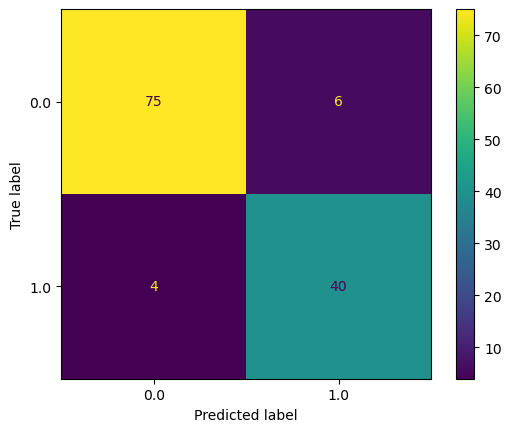

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(random_state = 1)
cl.fit(x_train, y_train)
y_predict = cl.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

#sklearn.metrics.ConfusionMatrixDisplay: This module provides a class for displaying confusion matrices.
#sklearn.metrics.accuracy_score: This function calculates the accuracy score of a classifier.
#sklearn.metrics.classification_report: This function generates a classification report for a classifier.
#sklearn.tree.DecisionTreeClassifier: This class implements a decision tree classifier.
#The DecisionTreeClassifier() class from the sklearn.tree module implements a decision tree classifier. The random_state parameter specifies a random seed to ensure that the split is reproducible.
#The fit() method is used to train the classifier on the training data. The predict() method is used to make predictions on new data.
#The ConfusionMatrixDisplay.from_predictions() function takes two arguments:
#y_test: The actual values of the test data.
#y_predict: The predicted values of the test data.
#The function returns a ConfusionMatrixDisplay object that can be used to display a confusion matrix.

In [9]:
print(classification_report(y_test,y_predict))

#The code print(classification_report(y_test,y_predict)) prints a classification report for the decision tree classifier on the x_test and y_test arrays.
#The classification report provides a comprehensive breakdown of the classifier's performance, including the following metrics:
#Precision: The fraction of positive predictions that are actually positive.
#Recall: The fraction of actual positives that are correctly predicted as positive.
#F1-score: A harmonic mean of precision and recall.
#Support: The total number of samples in each class.

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        81
         1.0       0.87      0.91      0.89        44

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.91       125
weighted avg       0.92      0.92      0.92       125



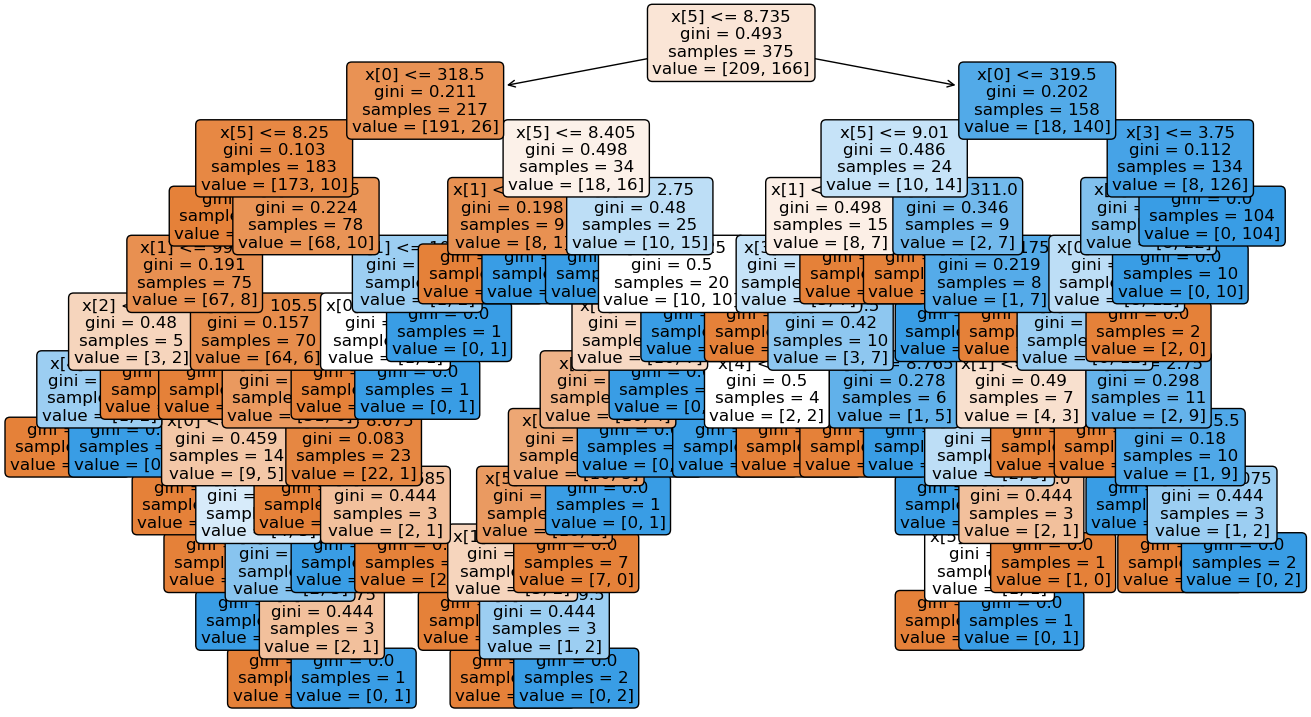

In [14]:
plt.figure(figsize = (16,9))
from sklearn.tree import plot_tree
plot_tree(cl,fontsize=12,rounded=True,filled=True)
plt.show()

#The code you provided plots the decision tree classifier (cl) using the plot_tree() function from the sklearn.tree module. The figsize parameter specifies the size of the figure, and the fontsize, rounded, and filled parameters control the appearance of the plot.
#The plot_tree() function takes two arguments:
#tree: The decision tree classifier to plot.
#max_depth: The maximum depth of the tree to plot. If None, the entire tree is plotted.
#The fontsize, rounded, and filled parameters control the appearance of the plot:
#fontsize: The font size of the text in the plot.
#rounded: Whether or not to round the corners of the nodes in the plot.
#filled: Whether or not to fill the nodes in the plot.
#This code will produce a plot of the decision tree classifier. The nodes in the plot represent the features in the data, and the edges represent the decision rules. The leaves of the tree represent the predicted classes.

In [18]:
x = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research" ]]
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

#The code x = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research" ]] y = df['Chance of Admit '] x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0) creates a training and test set for the machine learning model.
#The first line of code (x = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research" ]]) extracts the following features from the df DataFrame:
#The second line of code (y = df['Chance of Admit ']) assigns the Chance of Admit column from the df DataFrame to the variable y.
#The third line of code (x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)) splits the x and y arrays into training and test sets using the train_test_split() function from the sklearn.model_selection module. The test_size parameter specifies that 25% of the data will be used for the test set. The random_state parameter is used to ensure that the split is reproducible.
#After running this code, you will have two training and test sets:
#x_train: The training set of features.
#y_train: The training set of labels.
#x_test: The test set of features.
#y_test: The test set of labels.

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#DecisionTreeRegressor is a decision tree regressor that can be used to predict continuous values. Decision trees are made up of a series of nodes and edges. Each node represents a feature in the data, and each edge represents a decision rule. The leaves of the tree represent the predicted values.

#RandomForestRegressor is an ensemble learning algorithm that uses multiple decision trees to make predictions. This is done by training multiple decision trees on different subsets of the data and then aggregating the predictions of the individual trees. Random forests are generally more accurate and robust than individual decision trees.

#LogisticRegression is a classification algorithm that can be used to predict binary values. Logistic regression uses a sigmoid function to convert the predicted values to probabilities. Logistic regression is a simple and effective algorithm for many classification tasks.

In [21]:
DT = DecisionTreeRegressor(random_state = 0)
RFR = RandomForestRegressor(random_state = 0)
LR = LogisticRegression(random_state = 1, solver = "lbfgs", max_iter = 1000)

#DT is a decision tree regressor with a random state of 0.
#RFR is a random forest regressor with a random state of 0.
#LR is a logistic regression classifier with a random state of 1, a solver of "lbfgs", and a maximum number of iterations of 1000.

In [22]:
DT.fit(x_train, y_train)

#The fit() method builds the decision tree by recursively partitioning the feature space into smaller and smaller regions. At each split, the algorithm chooses the feature that best separates the samples in the current region into two classes. The algorithm continues splitting the feature space until it reaches a stopping criterion, such as a maximum depth or a minimum number of samples in a leaf node.

DecisionTreeRegressor(random_state=0)

In [23]:
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [24]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [25]:
y_predict_DT = DT.predict(x_test)
y_predict_RFR = RFR.predict(x_test)
y_predict_LR = LR.predict(x_test)

#The code y_predict_DT = DT.predict(x_test) makes predictions on the test data x_test using the decision tree regressor DT. The code y_predict_RFR = RFR.predict(x_test) makes predictions on the test data x_test using the random forest regressor RFR. The code y_predict_LR = LR.predict(x_test) makes predictions on the test data x_test using the logistic regression classifier LR.

#The predict() method takes the following arguments:

#x_test: The test data features.
#The predict() method returns the predicted values for the test data.

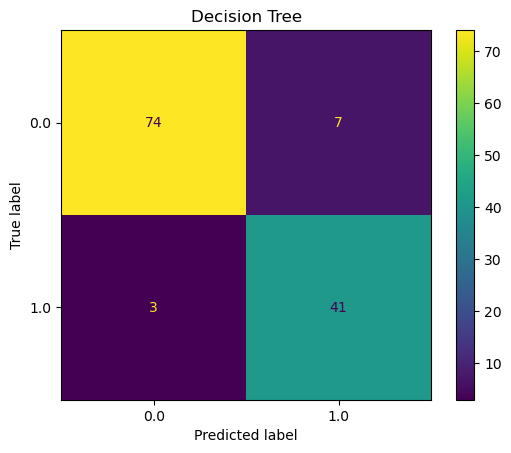

 Accuracy is 0.92
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94        81
         1.0       0.85      0.93      0.89        44

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.91       125
weighted avg       0.92      0.92      0.92       125



In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_DT)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_predict_DT)}")
print(classification_report(y_test,y_predict_DT))

#he code ConfusionMatrixDisplay.from_predictions(y_test, y_predict_DT) creates a confusion matrix display for the decision tree regressor DT on the test data y_test and y_predict_DT. The code plt.title('Decision Tree') sets the title of the plot to "Decision Tree". The code plt.show() displays the plot. The code print(f" Accuracy is {accuracy_score(y_test,y_predict_DT)}") prints the accuracy score of the decision tree regressor on the test data to the console. The code print(classification_report(y_test,y_predict_DT)) prints a classification report for the decision tree regressor on the test data to the console.

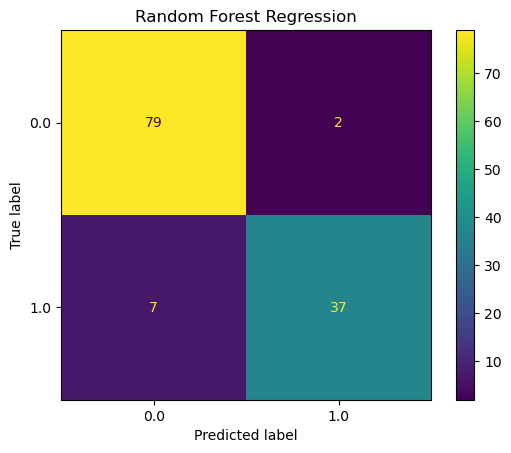

 Accuracy is 0.928
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        81
         1.0       0.95      0.84      0.89        44

    accuracy                           0.93       125
   macro avg       0.93      0.91      0.92       125
weighted avg       0.93      0.93      0.93       125



In [31]:
y_predict_RFR = [1 if each > 0.75 else 0 for each in y_predict_RFR]
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_RFR)
plt.title('Random Forest Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_predict_RFR)}")
print(classification_report(y_test,y_predict_RFR))

#The code y_predict_RFR = [1 if each > 0.75 else 0 for each in y_predict_RFR] converts the predicted values from the random forest regression model (y_predict_RFR) to binary values, with values greater than 0.75 being assigned to the class 1 and values less than or equal to 0.75 being assigned to the class 0.

#The code ConfusionMatrixDisplay.from_predictions(y_test, y_predict_RFR) creates a confusion matrix display for the random forest regression model (RFR) on the test data y_test and y_predict_RFR. The code plt.title('Random Forest Regression') sets the title of the plot to "Random Forest Regression". The code plt.show() displays the plot. The code print(f" Accuracy is {accuracy_score(y_test,y_predict_RFR)}") prints the accuracy score of the random forest regression model on the test data to the console. The code print(classification_report(y_test,y_predict_RFR)) prints a classification report for the random forest regression model on the test data to the console.

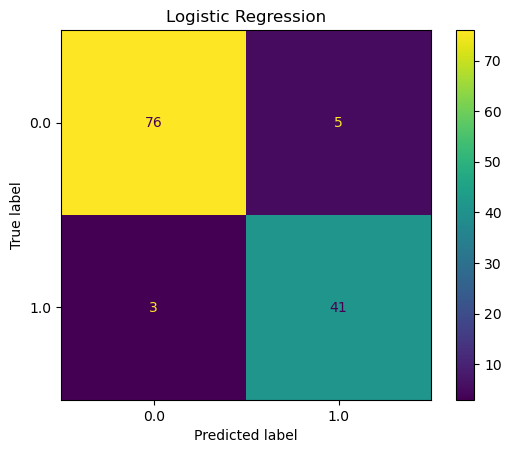

 Accuracy is 0.936
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        81
         1.0       0.89      0.93      0.91        44

    accuracy                           0.94       125
   macro avg       0.93      0.94      0.93       125
weighted avg       0.94      0.94      0.94       125



In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_LR)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_predict_LR)}")
print(classification_report(y_test,y_predict_LR))

#The code ConfusionMatrixDisplay.from_predictions(y_test, y_predict_LR) creates a confusion matrix display for the logistic regression classifier (LR) on the test data y_test and y_predict_LR. The code plt.title('Logistic Regression') sets the title of the plot to "Logistic Regression". The code plt.show() displays the plot. The code print(f" Accuracy is {accuracy_score(y_test,y_predict_LR)}") prints the accuracy score of the logistic regression classifier on the test data to the console. The code print(classification_report(y_test,y_predict_LR)) prints a classification report for the logistic regression classifier on the test data to the console.